## Decision Trees and Random Forests

In this script we will see how to build and use **Decision trees** and **Random Forest** algorithms and what advantages and disadvantages they have.
We will learn to use the python library **sklearn** (scikit-learn) which offers many learning algorithm straight out of the box.

### A short summary of the Decision Trees algorithm 
- A Decision Tree is a supervised learning algorithm.
- The goal of using a Decision Tree is to create a training model that can use to predict the class (or value) of the target variable by learning a collection of simple decision rules.

**Training:**
- At the base of the tree lies the root node.
- Form this node, the algorithm creates branches according to the feature values. The algorithm chooses the attribute that provides the greatest Information Gain (this is also the attribute that causes the greatest reduction in entropy).
- This splitting procedure is repeated until a stopping criterion is met.
- Need to retrain entire model if our training set changes (as opposed to other algorithms like Neural Networks).

**Prediction:**
- During prediction time, a single sample will flow through the tree according the the decision rules.
- The final prediction of the tree is the value in the leaf node in which the sample falls.

**Is the weather going to change tomorrow?**
![alt text](https://s3-ap-southeast-1.amazonaws.com/he-public-data/Fig%201-29c63772.png "Logo Title Text 1")

### A short example on how to use Decision Trees
- Consider the iris dataset, which consists of 3 **classes** of flowers.
- Each **sample** (flower) has a number of **features**.
- We will train a single Decision Tree to predict the **class** given the **feature** vector of the **sample**.

In [1]:
# Load all dependencies and the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# load the iris dataset 
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Add a new column with the species names.
# This is what we are going to try to predict.
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head(90)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,versicolor
86,6.7,3.1,4.7,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor
88,5.6,3.0,4.1,1.3,versicolor


In [4]:
# We convert the species names to a digit (0, 1, 2) for each class.
data['species'] = pd.factorize(data['species'])[0]
data.head(90)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,1
86,6.7,3.1,4.7,1.5,1
87,6.3,2.3,4.4,1.3,1
88,5.6,3.0,4.1,1.3,1


Let's now split the entire dataset into a **training** and **testing** set using a manuall approach.

In [6]:
data['is_train'] = np.random.uniform(0, 1, len(data)) <= 0.75
data.head()

train_data = data[data['is_train']]
test_data  = data[~data['is_train']]

print('Length of train data:', len(train_data))
print('Length of test data :', len(test_data))

Length of train data: 108
Length of test data : 42


Let's now construct the **features** (input to Decision Tree) and the **classes** (target of the Decision Tree).

In [7]:
features = data.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
targets  = data.columns[4]
targets

'species'

We can construct a Decision Tree object and train it.

In [10]:
clf = DecisionTreeClassifier()
clf.fit(train_data[features], train_data[targets])

DecisionTreeClassifier()

Now let's use the trained model to predict the class of test samples. Often it is useful to also display the probabilities with which the algorithm classifies a given sample.

In [11]:
clf.predict(test_data[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2],
      dtype=int64)

In [12]:
clf.predict_proba(test_data[features])[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

We can create a **confusion matrix** to show get a quick overview which classes are easy to predict and which ones are more difficult to distinguish.

In [13]:
predicted_species = clf.predict(test_data[features])
pd.crosstab(test_data['species'], 
            predicted_species,
            rownames=['Actual Species'], 
            colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,17,0,0
1,0,12,0
2,0,1,12


Finally, we can inspect which features are most important in the classification by reading out the **feature importances**.

In [14]:
fi = pd.DataFrame(clf.feature_importances_,
                  index=iris.feature_names,
                  columns=['importance'])
fi_sorted = fi.sort_values('importance', ascending=False)
fi_sorted

,importance
petal length (cm),0.549971
petal width (cm),0.436115
sepal length (cm),0.013914
sepal width (cm),0.000000


Using **plot_tree** we can visualize the tree.

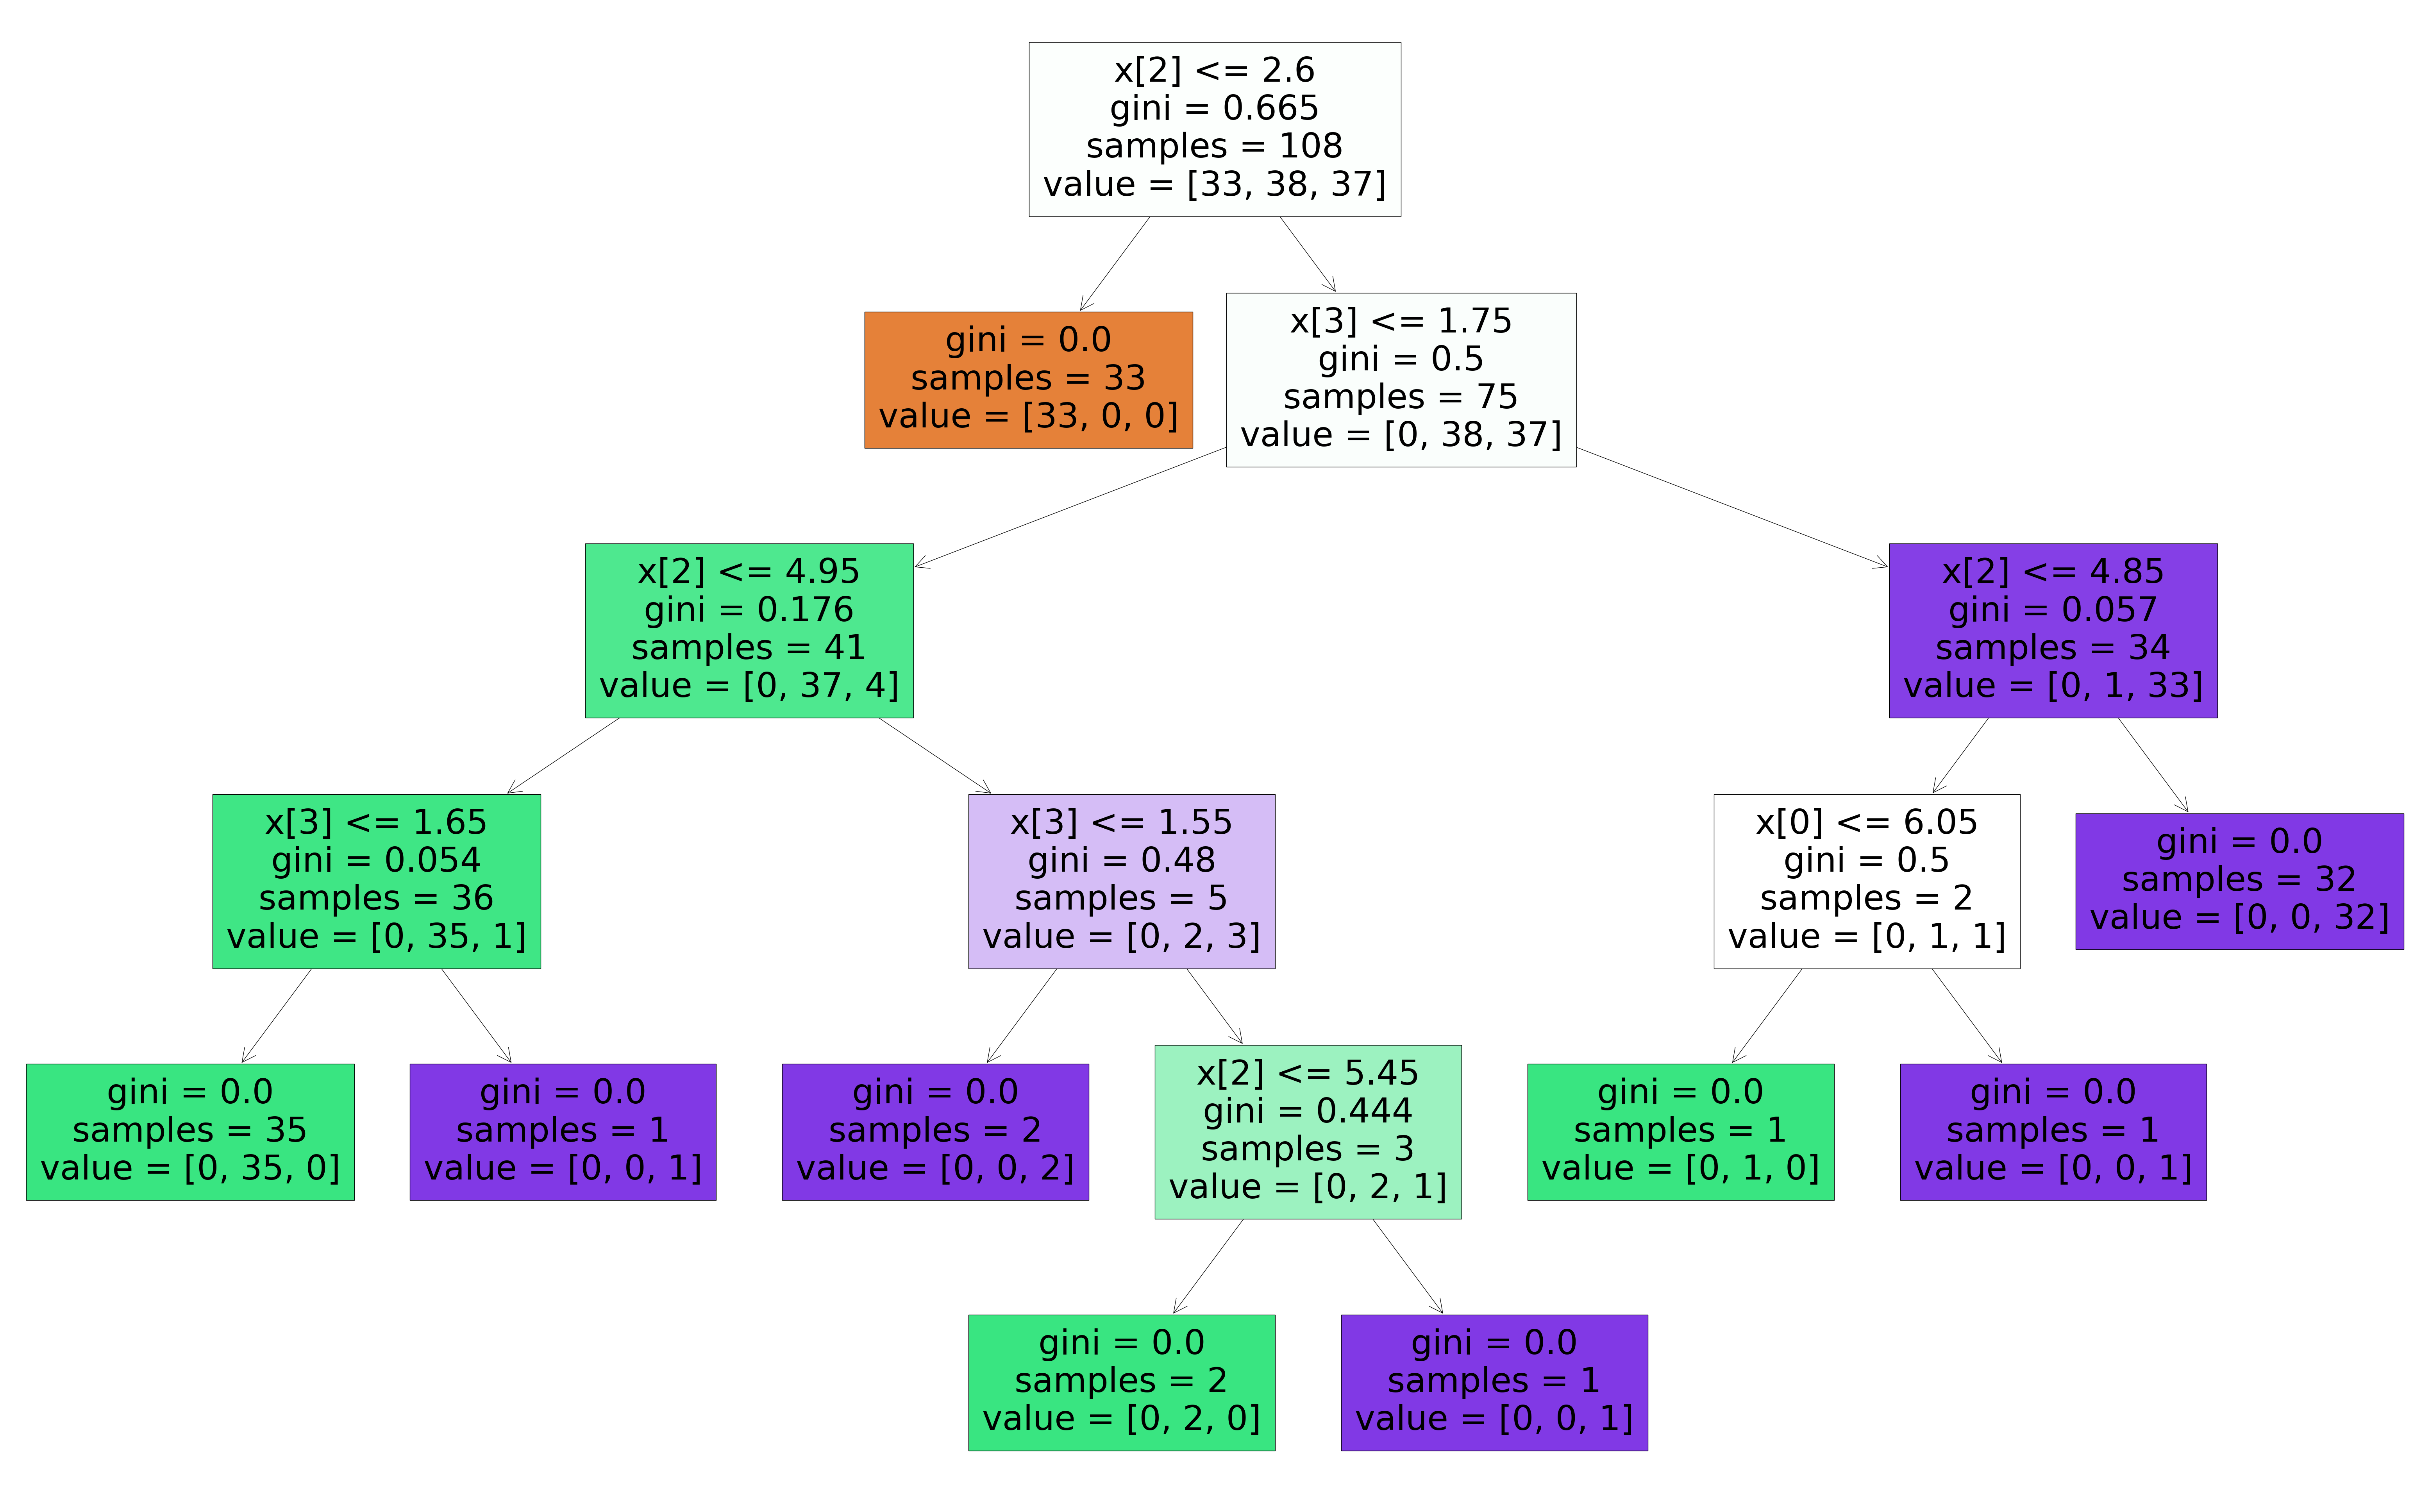

In [15]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
tree_fig = plot_tree(clf, filled=True)

### Classifying wine using decision Trees
- We load the wine dataset from sklearn.
- Then we investigate the features and targets. Are all feature columns suited for the Decision Tree algorithm?
- The **target** in this case is the wine quality that has been categorized in three classes (0, 1 and 2).
- In conclusion, we train a Decision Tree to predict the class from the input features.

In [16]:
from sklearn.datasets import load_wine
wine = load_wine()

# for this dataset we need to add the target manually...
data = pd.DataFrame(data=wine['data'],
                    columns=wine['feature_names'])
data['target'] = pd.Series(wine.target)

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


First, we split the dataset into a train and test set and fit the classifier.Construct feature and targets of the dataset.

In [18]:
from sklearn import model_selection

train_data, test_data = model_selection.train_test_split(data, test_size = 0.2)

features = data.columns[:13]
target = data.columns[13]

# ask how their splitting worked

Then we train the decision tree classifier. Test your classifier on your testing dataset and print the confusion matrix.Display each feature importance and visualize the decision tree.

In [19]:
# train classifier
clf = DecisionTreeClassifier()
clf.fit(train_data[features], train_data[target])

# test clf and print confusion matrix
predicted_species = clf.predict(test_data[features])
pd.crosstab(test_data['target'], 
            predicted_species,
            rownames=['Actual Species'], 
            colnames=['Predicted Species'])


Predicted Species,0,1,2
Actual Species,,,
0,11,1,0
1,1,11,0
2,0,4,8


In [20]:
# display feature importance

fi = pd.DataFrame(clf.feature_importances_,
                  index=features,
                  columns=['importance'])
fi_sorted = fi.sort_values('importance', ascending=False)
fi_sorted


,importance
proline,0.393264
flavanoids,0.316497
hue,0.115962
od280/od315_of_diluted_wines,0.109495
magnesium,0.041306
malic_acid,0.018472
alcohol,0.005003
ash,0.000000
alcalinity_of_ash,0.000000
total_phenols,0.000000


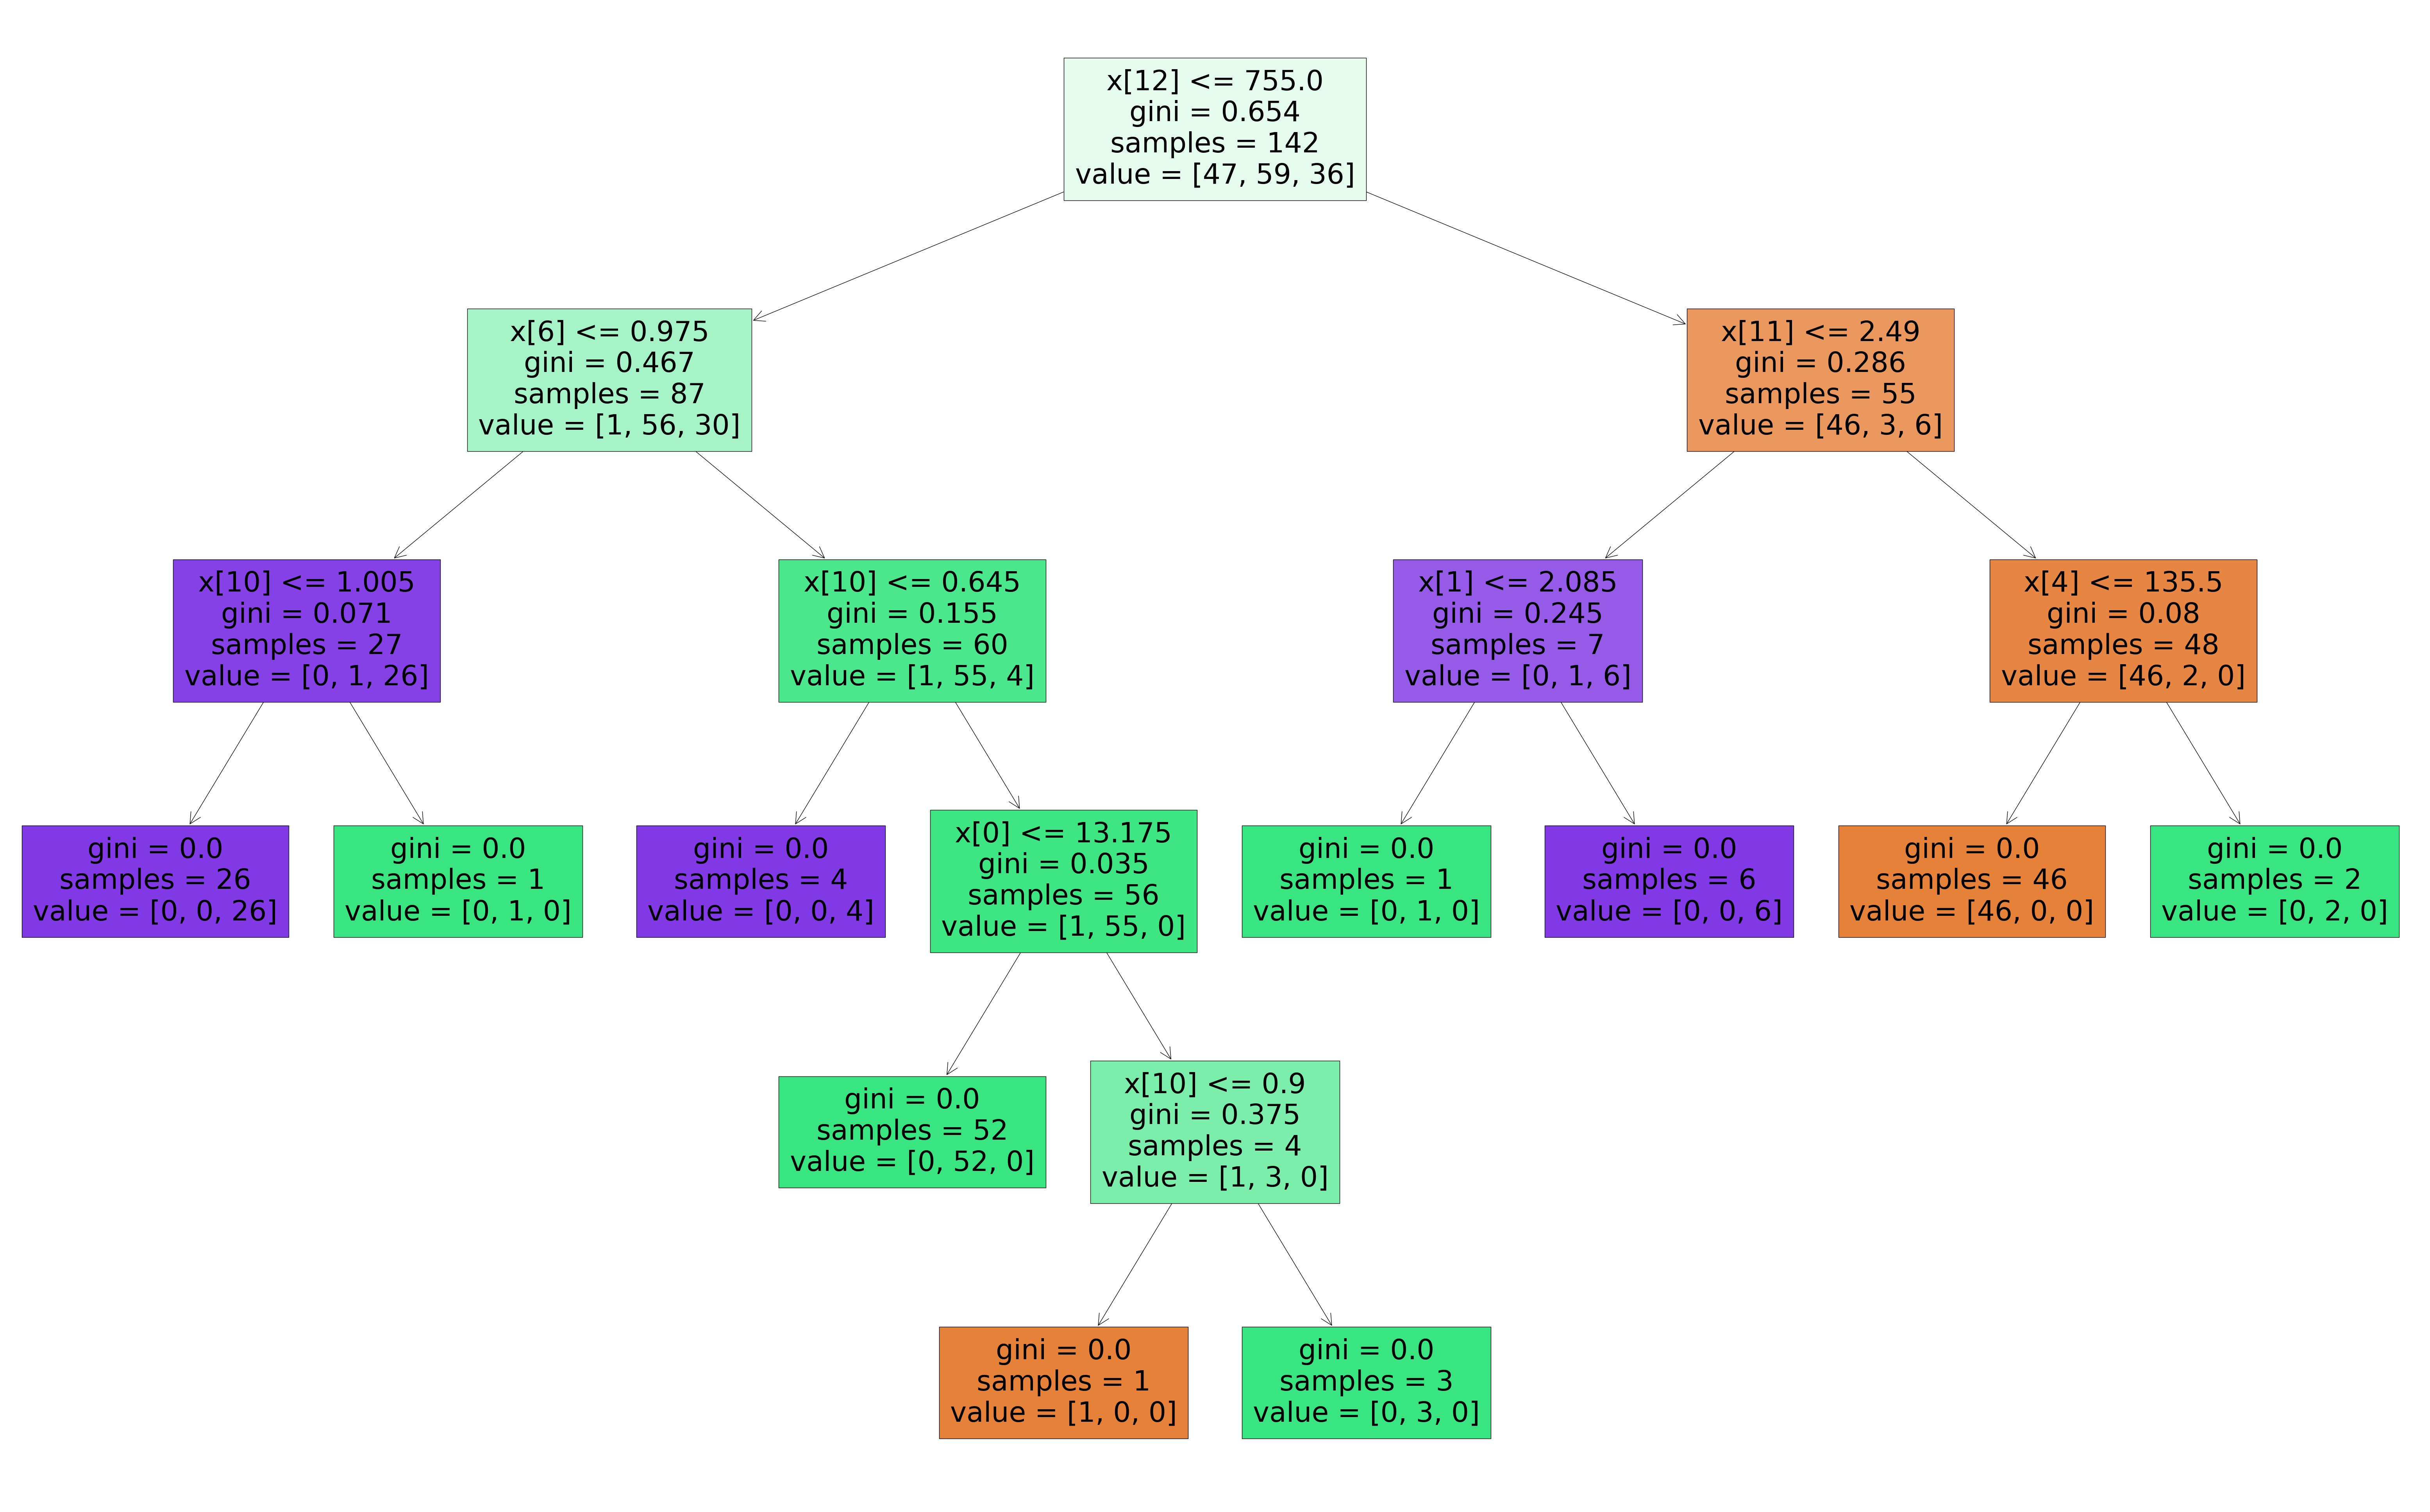

In [21]:
# display classification tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,50
tree_fig = plot_tree(clf, filled=True)

### A short summary of the Random Forest algorithm 
- A Random Forest consists of **many** decision trees.

**Training:**
- The algorithm trains each tree on a slightly different set of observations.
- For each tree the algorithm splits nodes considering a randomly chosen limited number of features.
- This splitting procedure is repeated for each tree, until a stopping criterion is met.
- Need to retrain entire model if our training set changes (as oppose to other algorithms like Neural Networks).

**Prediction:**
- During prediction time, a single sample will be propagated through all decision trees simultaneously.
- Each tree will give a prediction to which class the sample belongs.
- The final prediction of the entire random forest is made by averaging the predictions of each individual decision tree.


### Decision Trees vs. Random Forests
- Here, we will apply both DecisionTreeClassifier and RandomForestClassifier to the titanic dataset in order to predict whether, or not a passenger survived given its unique feature vector.

- Question to answer at the end: We inspect the feature importances in both cases. Are they the same? Can we find an explaination why certain features seem so dominant in the classification?


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, we construct targets from the column survived and features from the rest columns. You might need to assign number values for string variables. Afterward, split your dataset to training and testing.

In [24]:
# define features and target
df['Sex'] = pd.factorize(df['Sex'])[0]
df['Embarked'] = pd.factorize(df['Embarked'])[0]
features = df.columns[[1,3,4,5,6,8,10]]
target = df.columns[0]

# split data
df = df.dropna()
train_data, test_data = train_test_split(df, test_size = 0.2)

test_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,1
270,1,1,"Bissette, Miss. Amelia",1,35.0,0,0,PC 17760,135.6333,C99,0
622,1,1,"Kimball, Mr. Edwin Nelson Jr",0,42.0,1,0,11753,52.5542,D19,0
672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0


Now we train a decision tree and predict on the test set. Provide the confusion matrix of your results and importance of each feature.

In [25]:
# get rid of NAN and train clf

clf = DecisionTreeClassifier()
clf.fit(train_data[features], train_data[target])

# create confusion matrix

predicted_target_tree = clf.predict(test_data[features])
pd.DataFrame(confusion_matrix(test_data[target], predicted_target_tree))


,0,1
0,9,5
1,5,18


In [26]:
# confusion matrix with labels
pd.crosstab(test_data[target], 
            predicted_target_tree,
            rownames=['Actual Survivors'], 
            colnames=['Predicted Survivors'])

Predicted Survivors,0,1
Actual Survivors,,
0,9,5
1,5,18


In [27]:
# importance of features

fi = pd.DataFrame(clf.feature_importances_,
                  index=features,
                  columns=['importance'])
fi_sorted_tree = fi.sort_values('importance', ascending=False)
fi_sorted_tree

,importance
Age,0.341372
Sex,0.317967
Fare,0.288615
Embarked,0.036275
Parch,0.015772
Pclass,0.000000
SibSp,0.000000


Then we train a random forest classifier and predict on the test set. Let's also provide the confusion matrix of your results and importance of each feature.

In [28]:
# train random forest classifier

clff = RandomForestClassifier()
clff.fit(train_data[features], train_data[target])

# test clff

predicted_target_forrest = clff.predict(test_data[features])

# confusion matrix

pd.crosstab(test_data[target], 
            predicted_target_forrest,
            rownames=['Actual Survivors'], 
            colnames=['Predicted Survivors'])

Predicted Survivors,0,1
Actual Survivors,,
0,10,4
1,7,16


In [29]:
# feature importance

fi = pd.DataFrame(clff.feature_importances_,
                  index=features,
                  columns=['importance'])
fi_sorted_forrest = fi.sort_values('importance', ascending=False)
fi_sorted_forrest

,importance
Age,0.295523
Fare,0.288022
Sex,0.256567
Parch,0.049799
SibSp,0.048388
Embarked,0.035056
Pclass,0.026645


Now we ask ourselfes: What are the **main** differences between Decision Trees and Random Forests? Is there a reason to choose one algorithm over the other?

In [30]:
# accuracy scores of the models
score_tree = accuracy_score(test_data[target], predicted_target_tree)
score_forrest = accuracy_score(test_data[target], predicted_target_forrest)

print('accuracy of decision tree:            '  + str(round(score_tree,3)))
print('accuracy of random forrest algorithm: '  + str(round(score_forrest,3)))
print('delta accuracy:' +str(abs(round(score_tree-score_forrest,3))))

accuracy of decision tree:            0.73
accuracy of random forrest algorithm: 0.703
delta accuracy:0.027


Text(0.5, 1.0, 'Forrest Importance')

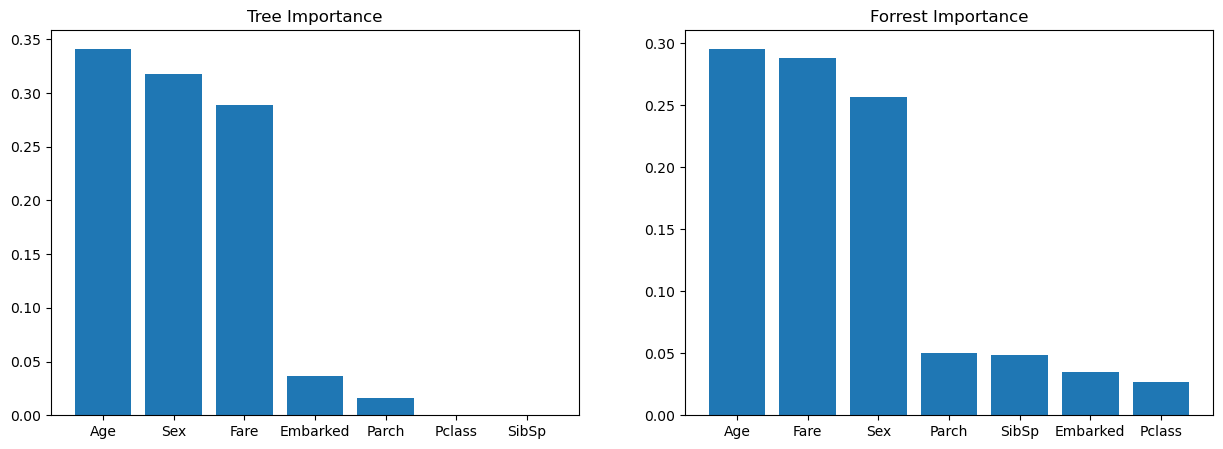

In [31]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

axs[0].bar(fi_sorted_tree.index.values, fi_sorted_tree['importance'])
axs[0].set_title('Tree Importance')
axs[1].bar(fi_sorted_forrest.index.values, fi_sorted_forrest['importance'])
axs[1].set_title('Forrest Importance')

#### Conclusion

The random forrest algorithm works with set of decision trees to enhance the power of the output. Therefore a decision tree is a random forrest algorithm with 1 estimator. As seen in the outputs above the random forrest algorithm with number of estimators = 100 shows a more evenly distributed feature importance between the features. In my example above this appears to be at the cost of the accuracy of the prediction.